<a href="https://colab.research.google.com/github/Kargashik/-DZ/blob/main/3_2_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Загрузите данные при помощи spark.read.csv из приложенного файла.

---


2.Выведите 5 первых строк данных.

---


3.Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка ('sepal_length','sepal_width','petal_length','petal_width').

---


4.Постройте точечную диаграмму для petal_length и petal_width, раскрашенный по типам цветков.

---


5.Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA -ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN).

---


6.При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с таким предсказанием.

---


7.Проверьте качество своего предсказания.Для этого:
7.1.Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный классбыл так же Setosa.7.2.Подсчитайте количество строк, где Вы предсказаликласс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" -!=)


#1.Загрузите данные при помощи spark.read.csv из приложенного файла.

In [54]:
!pip install pyspark py4j

In [55]:
!apt-get update


Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [56]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [53]:
!wget -q https://mirror.linux-ia64.org/apache/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz

In [57]:
!tar -xvf spark-3.0.3-bin-hadoop2.7.tgz

spark-3.0.3-bin-hadoop2.7/
spark-3.0.3-bin-hadoop2.7/NOTICE
spark-3.0.3-bin-hadoop2.7/kubernetes/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/Dockerfile
spark-3.0.3-bin-hadoop2.7/jars/
spark-3.0.3-bin-hadoop2.7/jars/jacks

In [58]:
!pip install -q findspark

In [59]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"

In [60]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [61]:
df=spark.read.csv('iris.csv', inferSchema=True, header=True)

In [62]:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal.length|        sepal.width|      petal.length|       petal.width|  variety|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335|  3.057333333333334|3.7580000000000027| 1.199333333333334|     null|
| stddev|0.8280661279778637|0.43586628493669793|1.7652982332594662|0.7622376689603467|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   Setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Virginica|
+-------+------------------+-------------------+------------------+------------------+---------+



In [63]:
df.count()

150

In [64]:
df1 = df.withColumnRenamed('sepal.length','sl') \
        .withColumnRenamed('sepal.width','sw') \
        .withColumnRenamed('petal.length','pl') \
        .withColumnRenamed('petal.width','pw')

#2.Выведите 5 первых строк данных.

In [65]:
df.take(5)

[Row(sepal.length=5.1, sepal.width=3.5, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.9, sepal.width=3.0, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.7, sepal.width=3.2, petal.length=1.3, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.6, sepal.width=3.1, petal.length=1.5, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=5.0, sepal.width=3.6, petal.length=1.4, petal.width=0.2, variety='Setosa')]

#3.Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка ('sepal_length','sepal_width','petal_length','petal_width').

In [66]:
df1.groupBy('variety').max().show()
df1.groupBy('variety').min().show()
df1.groupBy('variety').mean().show()

+----------+-------+-------+-------+-------+
|   variety|max(sl)|max(sw)|max(pl)|max(pw)|
+----------+-------+-------+-------+-------+
| Virginica|    7.9|    3.8|    6.9|    2.5|
|    Setosa|    5.8|    4.4|    1.9|    0.6|
|Versicolor|    7.0|    3.4|    5.1|    1.8|
+----------+-------+-------+-------+-------+

+----------+-------+-------+-------+-------+
|   variety|min(sl)|min(sw)|min(pl)|min(pw)|
+----------+-------+-------+-------+-------+
| Virginica|    4.9|    2.2|    4.5|    1.4|
|    Setosa|    4.3|    2.3|    1.0|    0.1|
|Versicolor|    4.9|    2.0|    3.0|    1.0|
+----------+-------+-------+-------+-------+

+----------+-----------------+------------------+------------------+------------------+
|   variety|          avg(sl)|           avg(sw)|           avg(pl)|           avg(pw)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.00

#4.Постройте точечную диаграмму для petal_length и petal_width, раскрашенный по типам цветков.


In [67]:
pdf = df1.toPandas()

In [68]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})

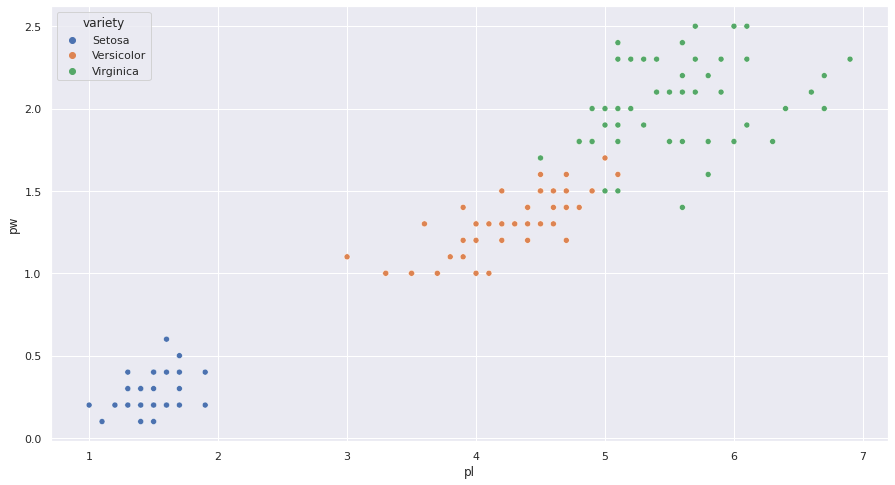

In [69]:
sns.scatterplot(data=pdf, x="pl", y="pw", hue="variety");

5.Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA -ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN).



#6.При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с таким предсказанием.
7.Проверьте качество своего предсказания.Для этого:
7.1.Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный классбыл так же Setosa.7.2.Подсчитайте количество строк, где Вы предсказаликласс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" -!=)


In [70]:
from pyspark.sql.functions import when
df1 = df1.withColumn("prediction", when(df1.pl < 2 ,'Setosa').otherwise('Unknown'))

In [71]:
df1.where(df1['prediction'] == df1['variety']).count()

50

In [72]:
df1.where(df1['variety'] != df1['variety']).count()

0

In [73]:
sc.stop()